# Data Preparation

### Initial Imports

In [1]:
import numpy as np
import tifffile
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
import scipy 
import tensorflow_addons as tfa
import tensorflow as tf
from tifffile import imwrite
import skimage 
from skimage import morphology

## Mask Binarization

### Loading Masks

In [ ]:
z = input('Enter the path to your file: \n')
mask = tifffile.imread('{}'.format(z))

In [ ]:
# Finding unique values in mask
arr = np.unique(mask6)
print(arr)

In [ ]:
# Deleting values of 0 and 1 from unique values array for masks. 
arr = np.delete(arr, 0) # use as many times as needed 

### Erosion Loop to Convert to Binary Masks

In [ ]:
def binarize(mask, arr): # arr is an array with all unique values of mask except 0 and 1
    mask_bw = 0 * mask # creating new array of the same size as mask, except all 0s
    for i in tqdm(range(len(arr))): 
        bw_i = (mask == arr[i]) # setting bw_i equal to every instance of a unique pixel value in mask
        bw_i = skimage.morphology.erosion(bw_i) # performing erosion
        mask_bw = mask_bw + bw_i 
    return mask_bw

In [ ]:
mask_bm = binarize(mask)

### Saving Masks

In [ ]:
# Save File to Desired Directory 
i = input('Enter your desired path for your file:')
tifffile.imwrite('{}'.format(i), mask_bm)

## Developing Labels with Only Cell Membrane

### Load Original Mask

In [52]:
# Input path to file to read original mask
k = input('Enter the path to your file: \n')
mask = tifffile.imread('{}'.format(k))

Enter the path to your file: 
/clusterfs/fiona/computational_subgroup/data/updated_20200731/ZF_TailbudDevelopment/matlab_stitch_noblend_primaryfirst_0711/CPPdecon/stitched/CPPdecon/membraneSegment_curated/Scan_Iter_0000_CamA_ch0_CAM1_stack0000_488nm_0000000msec_0016966725msecAbs_decon.tif


### Loading Binary (Eroded) Masks  

In [53]:
# Input path to file to read binary mask
j = input('Enter the path to your file: ')
binary_mask = tifffile.imread('{}'.format(j))

Enter the path to your file: /clusterfs/fiona/zeeshan/eroded_labels/eroded_mask_6.tif


## Removing Cytosolic Values

### Subtracting Cytosol from Eroded Mask

In [54]:
def rm_cytosol(mask, binary_mask):
    b_mask = mask>1 # mask --> original mask
    final_mask = binary_mask - b_mask
    return final_mask

### Converting Mask to Boolean

In [55]:
def conv_to_boolean(final_mask):
    final_mask.dtype = np.bool 
    final_mask = final_mask[::, ::, 1::2]
    return final_mask

### Creating Final Mask

In [56]:
final_mask = rm_cytosol(mask, binary_mask)
final_mask = conv_to_boolean(final_mask)

### Saving Final Mask

In [57]:
i = input("Enter your desired path for your file: ")
tifffile.imwrite('{}'.format(i), final_mask)

Enter your desired path for your file: /clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_raw_bm3_6.tif


##   

##   

# Image Scaling

## Load Raw Image

In [2]:
i = input('Enter the path to your raw image: \n')
raw_image = tifffile.imread('{}'.format(i))

Enter the path to your raw image: 
/clusterfs/fiona/computational_subgroup/data/updated_20200731/20191116_Imaging/4minInterval_18s_DHBRG_LifeactmScarlet/matlab_stitch_noblend_primaryfirst_0711/Scan_Iter_0000_CamB_ch0_CAM1_stack0000_488nm_0000000msec_0000305369msecAbs.tif


## Identifying Percentiles for Intensity 

In [3]:
ranges = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7, 95.8, 95.9, 96. , 96.1,
       96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8, 96.9, 97. , 97.1, 97.2,
       97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99.,  99.05,  99.1 ,  99.15,  99.2 ,  99.25,  99.3 ,  99.35,  99.4 ,
        99.45,  99.5 ,  99.55,  99.6 ,  99.65,  99.7 ,  99.75,  99.8 ,
        99.85,  99.9 ,  99.95, 100.  ])

## Calculate Image Intensity At Every Percentile

In [4]:
img = np.ndarray.flatten(raw_image)
intensity = np.zeros(shape=(155,))
for i in tqdm(range(len(ranges))): 
    intensity_at_percentile = np.percentile(raw_image, ranges[i])
    intensity[i] = intensity_at_percentile

100%|██████████| 155/155 [12:08<00:00,  4.70s/it]


## Plot Intensity Profile on Interactive Plot

### How to Use Plot 
Based on the intensity profile, find the pixel value when the intensity is at the 99.99th percentile. This pixel value (on x-axis) is what you will use for your rangeIn input for the next function. 

<IPython.core.display.Javascript object>


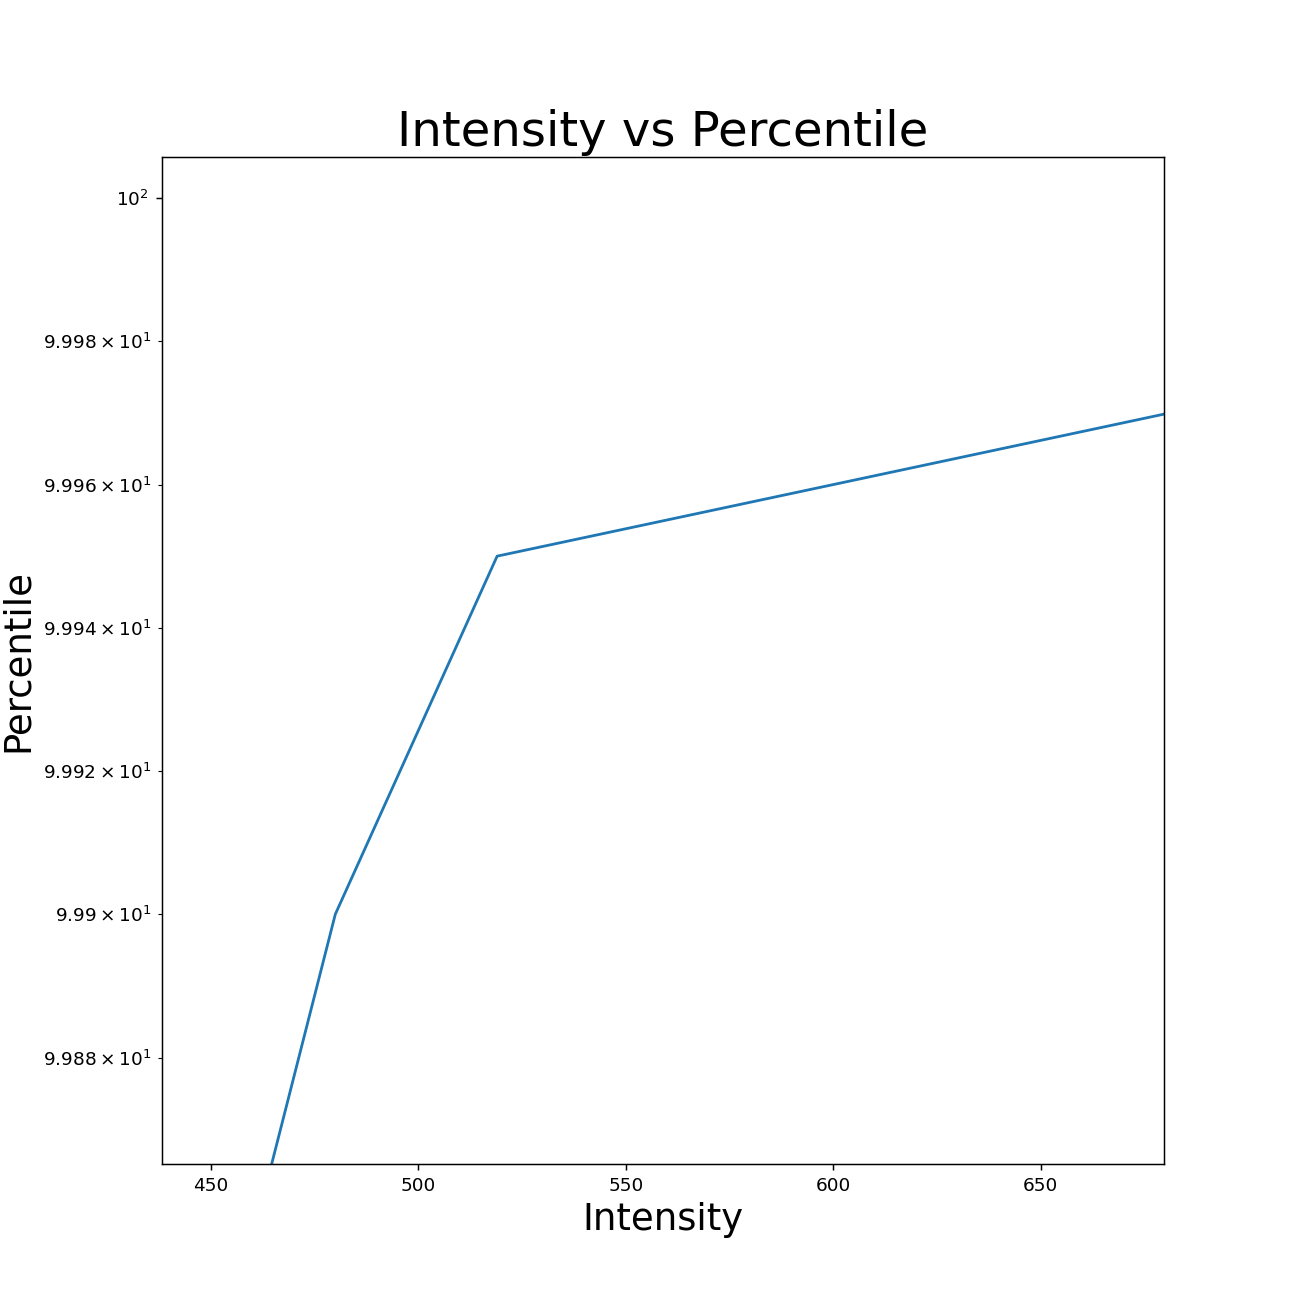

In [5]:
%matplotlib notebook
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Intensity vs Percentile', fontsize=26)
plt.xlabel('Intensity', fontsize=20)
plt.ylabel('Percentile', fontsize=20)
plt.yscale('log')
plt.plot(intensity, ranges)
plt.show()

## Re-Scaling/Normalizing Image to uint8

In [6]:
def scaleContrast(raw_img, rangeIn=(0,800), rangeOut=(0,255)):
    x = rangeOut[1] - rangeIn[0]
    if x == 0:
        out = np.zeros(shape=raw_img.shape)
    else: 
       out = (raw_img-rangeIn[0])/np.diff(rangeIn) * np.diff(rangeOut) + rangeOut[0]
    
    for i in tqdm(range(len(out))):
        for j in range(len(out[i])):
            for k in range(len(out[i][j])):
                if out[i][j][k] > rangeOut[1]:
                    out[i][j][k] = rangeOut[1]
    return np.uint8(out)

## Creating Scaled/Normalized Image

In [7]:
img_scaled = scaleContrast(raw_image, rangeIn=(0, 530), rangeOut=(0,255)) # Set rangeIn based on intensity profile

100%|██████████| 380/380 [09:11<00:00,  1.45s/it]


## Saving Scaled 8-bit Image

<IPython.core.display.Javascript object>


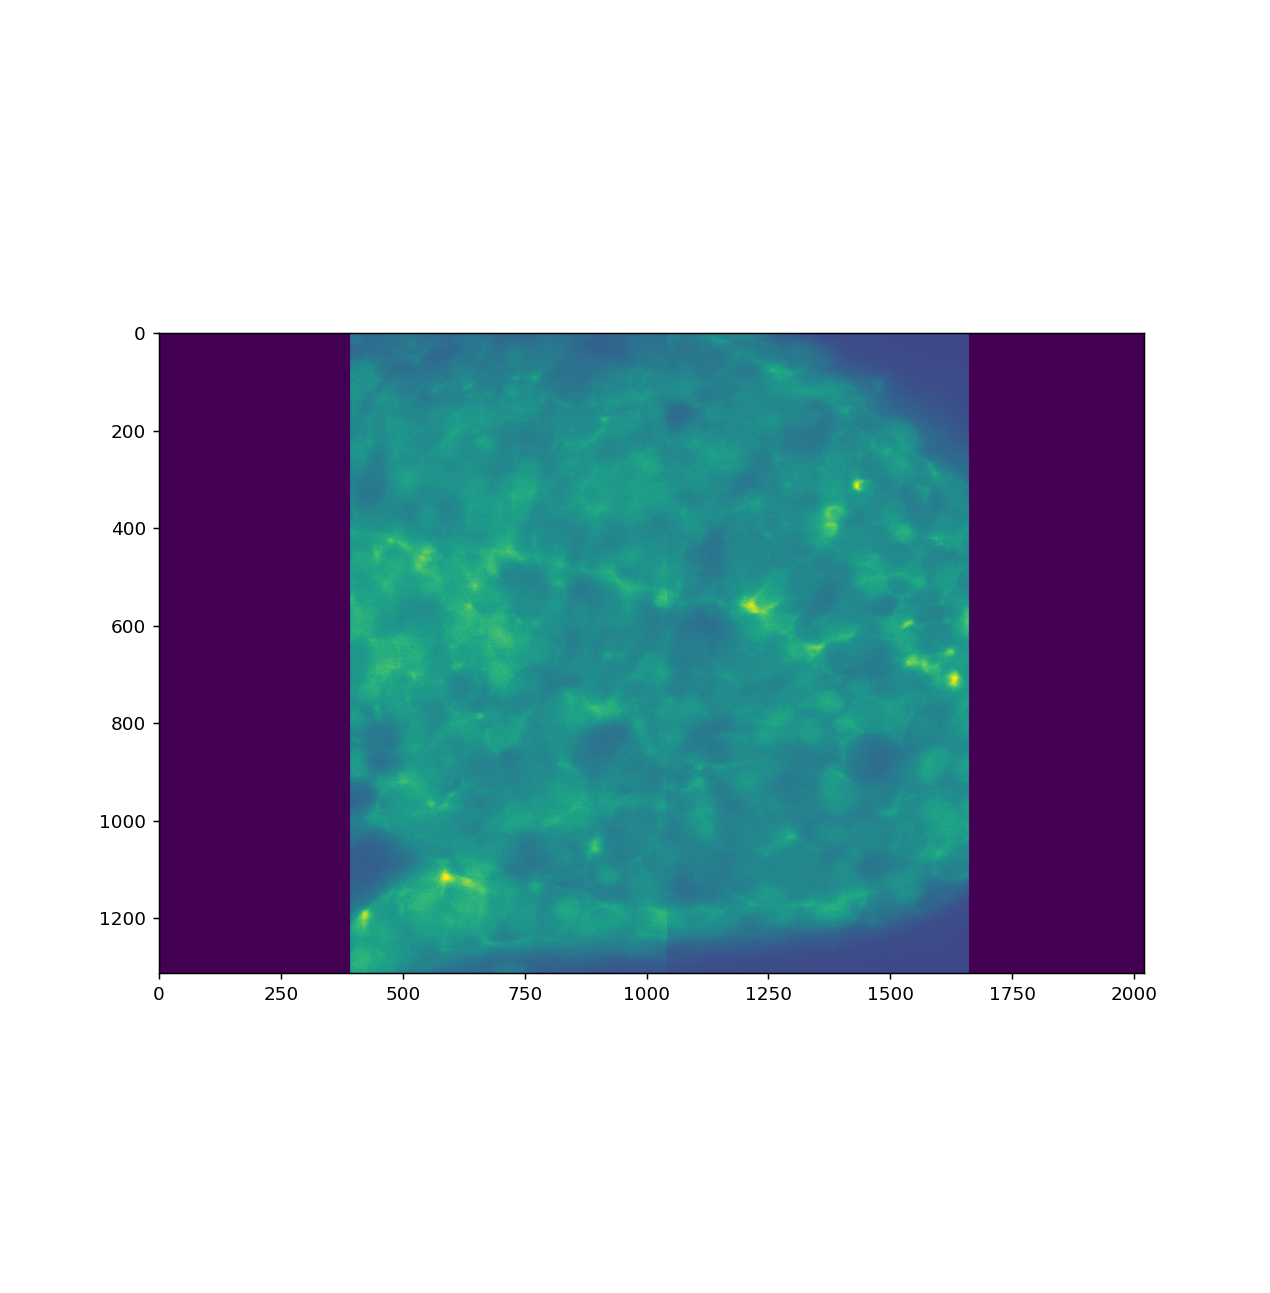

In [8]:
# Check if scaled image is created properly --> pixel values range should be rangeOut
%matplotlib notebook 
plt.figure(figsize=(10,10))
plt.imshow(img_scaled[183])

In [9]:
# Return to normal Matplotlib mode
%matplotlib inline

In [ ]:
# Save the 8-bit Image
k = input('Enter your desired file path for the new scaled image: \n')
tifffile.imwrite('{}'.format(k), img_scaled)

##   

##   

# Data Binning (2x2x2) + Augmentation

### Reading 3D Images using tifffile

In [13]:
img1 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_raw_scaled_img3_1.tif')
img2 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_raw_scaled_img3_2.tif')
img3 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_raw_scaled_img3_3.tif')
img4 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_raw_scaled_img3_4.tif')
img5 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_raw_scaled_img3_5.tif')
img6 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_raw_scaled_img3_6.tif')
# img7 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_scaled_img2_1.tif')
# img8 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_scaled_img2_2.tif')
img9 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_scaled_img_1.tif')
img10 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_scaled_img_2.tif')
img11 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/scaled_imgs/final_scaled_img_3.tif')
img1 = img1[1::2, 1::2, 1::2]
img2 = img2[1::2, 1::2, 1::2]
img3 = img3[1::2, 1::2, 1::2]
img4 = img4[1::2, 1::2, 1::2]
img5 = img5[1::2, 1::2, 1::2]
img6 = img6[1::2, 1::2, 1::2]
# img7 = img7[1::2, 1::2, 1::2]  binning not needed for img7
# img8 = img8[1::2, 1::2, 1::2]
img9 = img9[1::2, 1::2, 1::2]
img10 = img10[1::2, 1::2, 1::2]
img11 = img11[1::2, 1::2, 1::2]
print('img1: ' + f"{img1.shape}" + ' img2: ' + f"{img2.shape}" + ' img3: ' + f"{img3.shape}" + ' img4: ' + f"{img4.shape}" + ' img5: ' + f"{img5.shape}" + ' img6: ' + f"{img6.shape}"  + ' img9: ' + f"{img9.shape}" + ' img10: ' + f"{img10.shape}" + ' img11: ' + f"{img11.shape}")
 


img1: (190, 656, 1010) img2: (282, 750, 890) img3: (99, 1200, 1134) img4: (259, 657, 894) img5: (267, 658, 885) img6: (196, 794, 970) img9: (163, 800, 850) img10: (149, 800, 850) img11: (142, 800, 850)


### Reading image masks using tifffile

In [58]:
mask1 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_raw_bm3_1.tif')
mask2 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_raw_bm3_2.tif')
mask3 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_raw_bm3_3.tif')
mask4 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_raw_bm3_4.tif')
mask5 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_raw_bm3_5.tif')
mask6 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_raw_bm3_6.tif')
# mask7 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_bm2_1.tif')
# mask8 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_bm2_2.tif')
mask9 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_bm_1.tif')
mask10 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_bm_2.tif')
mask11 = tifffile.imread('/clusterfs/fiona/zeeshan/final_imgs/binary_masks/final_bm_3.tif')
mask1 = mask1[1::2, 1::2, 1::2]
mask2 = mask2[1::2, 1::2, 1::2]
mask3 = mask3[1::2, 1::2, 1::2]
mask4 = mask4[1::2, 1::2, 1::2]
mask5 = mask5[1::2, 1::2, 1::2]
mask6 = mask6[1::2, 1::2, 1::2]
# mask7 = mask7[1::2, 1::2, 1::2]
# mask8 = mask8[1::2, 1::2, 1::2]
mask9 = mask9[1::2, 1::2, 1::2]
mask10 = mask10[1::2, 1::2, 1::2]
mask11 = mask11[1::2, 1::2, 1::2]

print(' Mask1: ' + f"{mask1.shape}" + ' Mask2: ' + f"{mask2.shape}" + ' Mask3: ' + f"{mask3.shape}" + ' Mask4: ' + f"{mask4.shape}" + ' Mask5: ' + f"{mask5.shape}" + ' Mask6: ' + f"{mask6.shape}"  + ' Mask9: ' + f"{mask9.shape}" + ' Mask10: ' + f"{mask10.shape}" + ' Mask11: ' + f"{mask11.shape}")


 Mask1: (190, 656, 1010) Mask2: (282, 750, 890) Mask3: (99, 1200, 1134) Mask4: (259, 657, 894) Mask5: (267, 658, 885) Mask6: (196, 794, 970) Mask9: (163, 800, 850) Mask10: (149, 800, 850) Mask11: (142, 800, 850)


In [59]:
# Converting masks from bool to uint8 in order to use augmentation functions
mask1.dtype = np.uint8
mask2.dtype = np.uint8
mask3.dtype = np.uint8
mask4.dtype = np.uint8
mask5.dtype = np.uint8
mask6.dtype = np.uint8
# mask7.dtype = np.uint8
# mask8.dtype = np.uint8
mask9.dtype = np.uint8
mask10.dtype = np.uint8
mask11.dtype = np.uint8

# Image Augmentation Functions

### Cropping Function (produces random chunks)

In [60]:
def crop_img_mask(img, mask, chunkh, chunkw, chunkl, imgh, imgw, imgl):
        start_h = random.randint(0, imgh-chunkh)
        start_w = random.randint(0, imgw-chunkw)
        start_l = random.randint(0, imgl-chunkl)
        
        cropped_img = img[start_h:start_h+chunkh, start_w:start_w+chunkw, start_l:start_l+chunkl]
        cropped_mask = mask[start_h:start_h+chunkh, start_w:start_w+chunkw, start_l:start_l+chunkl]
        
        if (cropped_mask.shape == (chunkh, chunkw, chunkl)) & (cropped_img.shape == (chunkh, chunkw, chunkl)):                                       
            return cropped_img , cropped_mask

### Rotation and Flip 

In [61]:
def rotation(cropped_img, cropped_mask):
    cropped_img = tfa.image.rotate(cropped_img, tf.constant((2*np.pi)/2), interpolation="BILINEAR")
    cropped_mask = tfa.image.rotate(cropped_mask, tf.constant((2*np.pi)/2), interpolation="BILINEAR")
    return cropped_img, cropped_mask

In [62]:
def flip_img(cropped_img, cropped_mask): 
    cropped_img = tf.image.flip_left_right(cropped_img)
    cropped_mask = tf.image.flip_left_right(cropped_mask)
    cropped_img = tf.image.flip_up_down(cropped_img)
    cropped_mask = tf.image.flip_up_down(cropped_mask) 
    return cropped_img, cropped_mask

### Random Augmentation (Crop + Rotation + Rotation)

In [63]:
def random_augmentation(img, mask, chunkh, chunkw, chunkl, imgh, imgw, imgl):
    
    cropped_img, cropped_mask = crop_img_mask(img, mask, chunkh, chunkw, chunkl, imgh, imgw, imgl)

    random_number = random.randint(1,4) 
    if (cropped_mask.shape == (chunkh, chunkw, chunkl)) & (cropped_img.shape == (chunkh, chunkw, chunkl)):
        if random_number == 1:
            cropped_mask = np.array(cropped_mask, dtype=np.bool)
            return cropped_img, cropped_mask
        elif random_number == 2:
            cropped_img = tfa.image.rotate(cropped_img, tf.constant((2*np.pi)/2), interpolation="BILINEAR")
            cropped_mask = tfa.image.rotate(cropped_mask, tf.constant((2*np.pi)/2), interpolation="BILINEAR")
            cropped_img = np.array(cropped_img)
            cropped_mask = np.array(cropped_mask, np.bool)
            return cropped_img, cropped_mask
        elif random_number == 3:
            cropped_img = tf.image.flip_left_right(cropped_img)
            cropped_mask = tf.image.flip_left_right(cropped_mask)
            cropped_img = tf.image.flip_up_down(cropped_img)
            cropped_mask = tf.image.flip_up_down(cropped_mask) 
            cropped_img = np.array(cropped_img)
            cropped_mask = np.array(cropped_mask, np.bool)
            return cropped_img, cropped_mask
        else:
            cropped_img = tfa.image.rotate(cropped_img, tf.constant((2*np.pi)/2), interpolation="BILINEAR")
            cropped_mask = tfa.image.rotate(cropped_mask, tf.constant((2*np.pi)/2), interpolation="BILINEAR")
            cropped_img = tf.image.flip_left_right(cropped_img)
            cropped_mask = tf.image.flip_left_right(cropped_mask)
            cropped_img = tf.image.flip_up_down(cropped_img)
            cropped_mask = tf.image.flip_up_down(cropped_mask) 
            cropped_img = np.array(cropped_img)
            cropped_mask = np.array(cropped_mask, np.bool)
            return cropped_img, cropped_mask


### Noise Function 

In [64]:
def add_noise(img, nmean=10, nstd=10):
    # generate random Gaussian values
    from numpy.random import seed
    from numpy.random import randn
    # seed random number generator
    seed(1)
    sz = img.shape;
#     nmean = 10; # mean in Gaussian distribution
#     nstd = 10; # std in Gaussian distribution        
    noise_image = randn(sz[0], sz[1], sz[2]) * nstd + nmean;
    raw_image_with_noise = img + noise_image;
    raw_image_with_noise = raw_image_with_noise * (img > 0); # only add noise to the location with intensity.
    return raw_image_with_noise

### Adding Noise On Crops With Desired Noise Level 
Noise levels will range from μ = [30, 35, 40] and σ = [20, 24, 28]. 

In [65]:
def add_noise_on_crop(cropped_img, noise_level):
    if noise_level == 1: 
        cropped_img = add_noise(cropped_img, nmean=30 , nstd=20)
        return cropped_img
    elif noise_level == 2: 
        cropped_img = add_noise(cropped_img, nmean=35 , nstd=20)
        return cropped_img
    elif noise_level == 3: 
        cropped_img = add_noise(cropped_img, nmean=40 , nstd=20)
        return cropped_img
    elif noise_level == 4: 
        cropped_img = add_noise(cropped_img, nmean=30 , nstd=24)
        return cropped_img
    elif noise_level == 5: 
        cropped_img = add_noise(cropped_img, nmean=35 , nstd=24)
        return cropped_img
    elif noise_level == 6: 
        cropped_img = add_noise(cropped_img, nmean=40 , nstd=24)
        return cropped_img
    elif noise_level == 7:
        cropped_img = add_noise(cropped_img, nmean=30 , nstd=28)
        return cropped_img
    elif noise_level == 8: 
        cropped_img = add_noise(cropped_img, nmean=35 , nstd=28)
        return cropped_img
    elif noise_level == 9: 
        cropped_img = add_noise(cropped_img, nmean=40 , nstd =28)
        return cropped_img
    else:
        print('Noise Level {}'.format(noise_level) + ' is out of bounds. Please use a number between 1-9 inclusive.')

# Creating Training and Testing Datasets

## Training Data

In [67]:
counter = 0
while counter < 300: 
    cropped_img, cropped_mask = random_augmentation(img1, mask1, 64, 128, 128, 190, 656, 1010)
    imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/no_noise/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/no_noise/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1
counter = 300
while counter < 600: 
    cropped_img, cropped_mask = random_augmentation(img2, mask2, 64, 128, 128, 282, 750, 890)
    imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/no_noise/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/no_noise/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1

counter = 600
while counter < 900: 
    cropped_img, cropped_mask = random_augmentation(img3, mask3, 64, 128, 128, 99, 1200, 1134)
    imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/no_noise/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/no_noise/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1
counter = 0
img4_n = add_noise(img4, nmean=25, nstd=10)
while counter < 300: 
    cropped_img, cropped_mask = random_augmentation(img4_n, mask4, 64, 128, 128, 259, 657, 894)
    imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/no_noise/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/no_noise/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1
    
counter = 300
img5_n = add_noise(img5, nmean=25, nstd=10)
while counter < 600: 
    cropped_img, cropped_mask = random_augmentation(img5_n, mask5, 64, 128, 128, 267, 658, 885)
    imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/noise_level_1/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/noise_level_1/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1

counter = 600
img6_n = add_noise(img6, nmean=25, nstd=10)
while counter < 900: 
    cropped_img, cropped_mask = random_augmentation(img6_n, mask6, 64, 128, 128, 196, 794, 970)
    imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/noise_level_1/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/noise_level_1/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1

# counter = 400
# img7_n = add_noise(img7, nmean=25, nstd=10)
# while counter < 600: 
#     cropped_img, cropped_mask = random_augmentation(img7_n, mask7, 64, 128, 128, 158, 1285, 872)
#     imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/noise_level_1/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
#     imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/noise_level_1/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
#     counter +=1
# counter = 600
# img8_n = add_noise(img8, nmean=25, nstd=10)
# while counter < 800: 
#     cropped_img, cropped_mask = random_augmentation(img8_n, mask8, 64, 128, 128, 407, 662, 755)
#     imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/noise_level_1/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
#     imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/noise_level_1/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
#     counter +=1
    
counter = 0
img9_n2 = add_noise(img9, nmean=30, nstd=18)
while counter < 300: 
    cropped_img, cropped_mask = random_augmentation(img9_n2, mask9, 64, 128, 128, 163, 800, 850)
    imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/noise_level_2/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/noise_level_2/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1
counter = 300
img10_n2 = add_noise(img10, nmean=30, nstd=18)
while counter < 600: 
    cropped_img, cropped_mask = random_augmentation(img10_n2, mask10, 64, 128, 128, 149, 800, 850)
    imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/noise_level_2/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/noise_level_2/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1

counter = 600
img11_n2 = add_noise(img11, nmean=30, nstd=18)
while counter < 900: 
    cropped_img, cropped_mask = random_augmentation(img11_n2, mask11, 64, 128, 128, 142, 800, 850)
    imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/noise_level_2/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/noise_level_2/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1
# counter = 600
# img8_n2 = add_noise(img8, nmean=30, nstd=18)
# while counter < 800: 
#     cropped_img, cropped_mask = random_augmentation(img8_n2, mask8, 64, 128, 128, 407, 662, 755)
#     imwrite('/clusterfs/fiona/zeeshan/cropped_imgs/raw_data/noise_level_2/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
#     imwrite('/clusterfs/fiona/zeeshan/cropped_masks/raw_data/noise_level_2/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
#     counter +=1

print('Done!')

Done!


## Testing Data 

In [68]:
counter = 0
while counter < 25: 
    cropped_img, cropped_mask = random_augmentation(img3, mask3, 64, 128, 128, 99, 1200, 1134)
    imwrite('/clusterfs/fiona/zeeshan/cropped_test_imgs/raw_data/no_noise/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_test_masks/raw_data/no_noise/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1
counter = 0
img11_n1 = add_noise(img11, nmean=25, nstd=10)
while counter < 25: 
    cropped_img, cropped_mask = random_augmentation(img11_n1, mask11, 64, 128, 128, 142, 800, 850)
    imwrite('/clusterfs/fiona/zeeshan/cropped_test_imgs/raw_data/noise_level_1/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_test_masks/raw_data/noise_level_1/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1
counter = 0
img6_n2 = add_noise(img6, nmean=30, nstd=18)
while counter < 25: 
    cropped_img, cropped_mask = random_augmentation(img6_n2, mask6, 64, 128, 128, 196, 794, 970)
    imwrite('/clusterfs/fiona/zeeshan/cropped_test_imgs/raw_data/noise_level_2/cropped_img_' + f"{counter:03}" + '.tif', cropped_img)
    imwrite('/clusterfs/fiona/zeeshan/cropped_test_masks/raw_data/noise_level_2/cropped_mask_' + f"{counter:03}" + '.tif', cropped_mask)
    counter +=1
print('Done!')

Done!
